In [321]:
import os
import sys

os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['PYTHONIOENCODING'] = 'utf-8'

import matplotlib.pyplot as plt
import pathlib
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow import keras

#sys.stdout.reconfigure(encoding='utf-8')
#sys.stderr.reconfigure(encoding='utf-8')

size_tuple = (150,150)
epochs = 40

In [322]:
categorias = []
labels = []
imagenes  = []

In [323]:
categorias =  [archivo for archivo in os.listdir("Imagenes") if not archivo.startswith('.')]
print(categorias)

['Boca', 'Estudiantes', 'Gimnasia', 'Independiente', 'Racing', 'River', 'San Lorenzo', 'Velez']


In [324]:
x=0
for directorio in categorias:
    imagenes_dir = [imagen for imagen in os.listdir('Imagenes/'+directorio) if not imagen.startswith('.')]
    for imagen in imagenes_dir:
        img = Image.open('Imagenes/'+directorio+'/'+imagen).resize(size_tuple)
        img = np.asarray(img)
        imagenes.append(img)
        labels.append(x)
    x += 1

In [325]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]


In [326]:
imagenes=np.asanyarray(imagenes)
imagenes.shape
imagenes = imagenes[:,:,:,0]

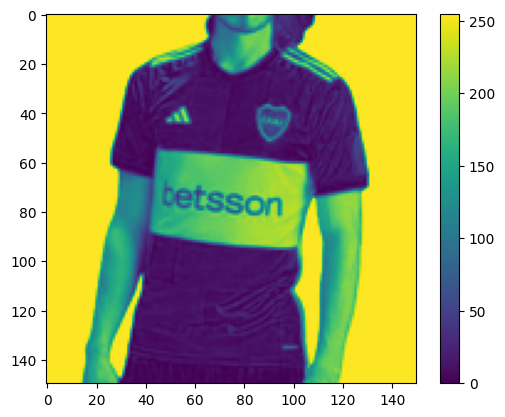

In [327]:
plt.figure()
plt.imshow(imagenes[7])
plt.colorbar()
plt.grid(False)
plt.show()

In [328]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=size_tuple),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0,25),
    tf.keras.layers.Dense(len(categorias),activation='softmax')
])

In [329]:
model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [330]:
labels = np.array(labels)

In [331]:
history = model.fit(imagenes, labels, epochs=epochs)

Epoch 1/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.0863 - loss: 5657.1958
Epoch 2/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.1044 - loss: 14585.9189
Epoch 3/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.2215 - loss: 9978.1445 
Epoch 4/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.3472 - loss: 8451.7910
Epoch 5/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.2955 - loss: 5508.5083
Epoch 6/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.2236 - loss: 2916.8452
Epoch 7/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.2067 - loss: 2658.4968
Epoch 8/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.4616 - loss: 1179.3157
Epoch 9/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.3607 - loss: 675.2108
Epoch 10/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.4445 - loss: 516.9527
Epoch 11/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6155 - loss: 333.3922
Epoch 12/40
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - a

In [350]:
correcto = 0
incorrecto = 0
root_dir = 'Validacion' 

for subdir, dirs, files in os.walk(root_dir):
    for file in files:
        if not file.startswith('.'):
            im = Image.open(os.path.join(subdir, file)).resize(size_tuple)
            im = np.asarray(im)
            im = im[:,:,0]
            im = np.asarray([im])
            test=im
            predicciones = model.predict(test)  
            print(str(file))
            print(categorias[np.argmax(predicciones[0])])
            actual_categoria = os.path.basename(subdir)
            print(actual_categoria)
            if(categorias[np.argmax(predicciones[0])] == actual_categoria):
                correcto += 1
            else:
                incorrecto += 1

print('Validaciones Correctas: '+ str(correcto))
print('Validaciones Incorrectas: '+ str(incorrecto))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
example.jpg
River
Validacion
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
racing (6).jpg
Estudiantes
Actual
Validaciones Correctas: 0
Validaciones Incorrectas: 2


In [333]:
nombre_imagen_de_prueba = os.listdir("Prediccion")[0]
imagen_prueba = "Prediccion/" + nombre_imagen_de_prueba
im = Image.open(imagen_prueba).resize(size_tuple)
im = np.asarray(im)
im = im[:,:,0]
im = np.asarray([im])
im.shape
test=im

In [334]:
prediccion = model.predict(test)  
print(prediccion)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[0. 0. 1. 0. 0. 0. 0. 0.]]


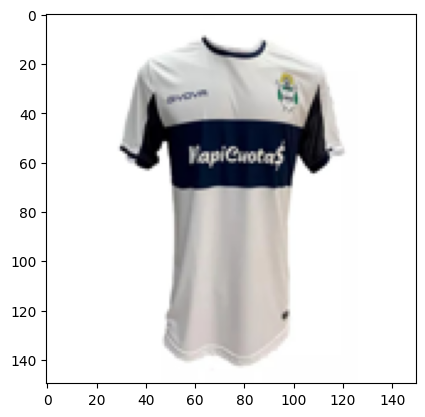

In [335]:
img = Image.open(imagen_prueba).resize(size_tuple)
plt.figure()
plt.imshow(img)
plt.show()

In [336]:
categorias[np.argmax(prediccion[0])]

'Gimnasia'

In [337]:
model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_19 (Flatten)            │ (None, 22500)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 256)            │     5,760,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,286,938 (65.94 MB)

 Trainable params: 5,762,312 (21.98 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,524,626 (43.96 MB)

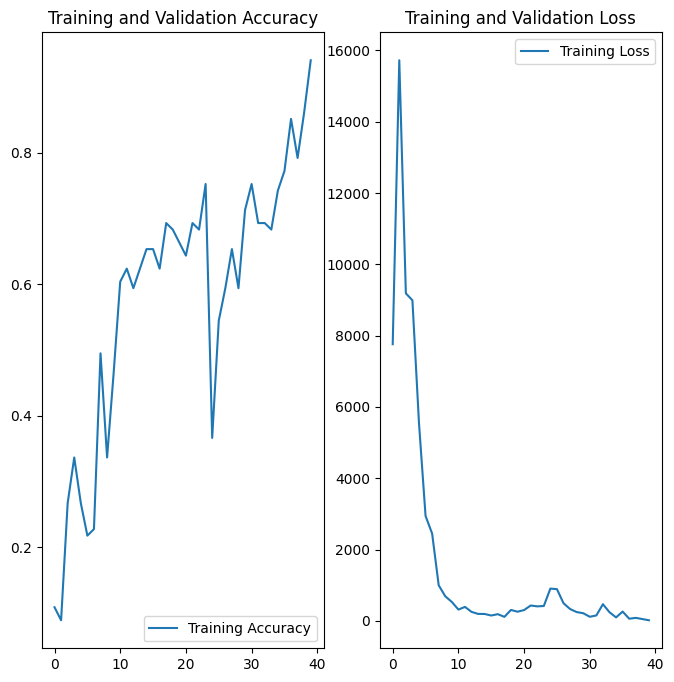

In [338]:
acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']

loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
#plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
#plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [339]:
#tf.keras.utils.plot_model(model,to_file='rna.png', show_shapes=True,rankdir='LR')